<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [134]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [135]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [136]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

df = pd.read_csv('titanic.csv') #primero leo y almaceno el csv en una variable!

des = df.describe()

#ahora, el análisis de datos faltantes (agregando las filas para ello)
des.loc['Nan']= df.isna().sum()
des.loc['%Nan'] = (df.isna().sum())*100

des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,17700.000000,0.000000,0.000000,0.000000


In [137]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

df2 = df[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [139]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

# No se había encontrado elementos faltantes, pero el código para eliminarlos es:
df2 = df2.dropna()


In [140]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
print(f'Número de filas a analizar: {df2.shape[0]}')

Número de filas a analizar: 714


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [141]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [142]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o no
print(df2['Survived'].value_counts())

0    424
1    290
Name: Survived, dtype: int64


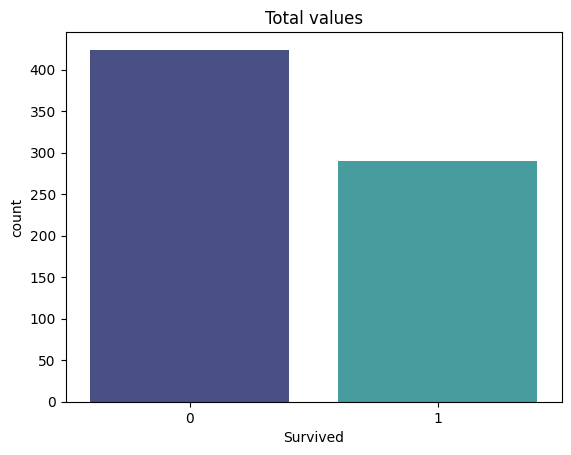

In [143]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(x=df2['Survived'], palette = 'mako', width=0.8).set(title='Total values')
plt.show()

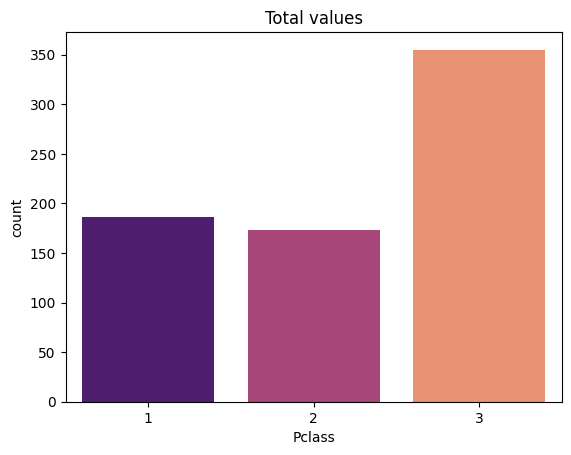

In [144]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot

sns.countplot(x=df2['Pclass'], palette = 'magma', width=0.8).set(title='Total values')
plt.show()

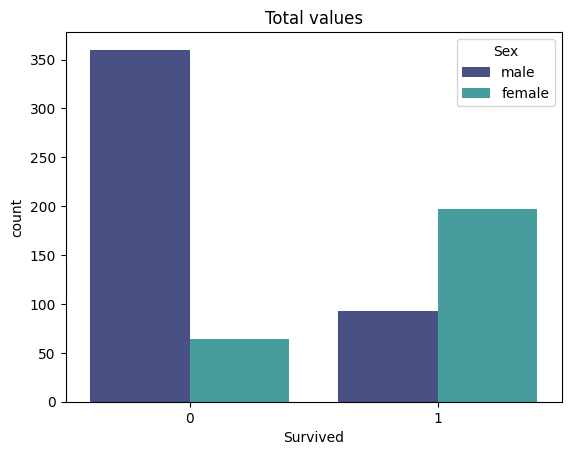

In [145]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

# Se precisa una modificación respecto del gráfico anterior, para evitar este error: ValueError: Could not interpret input 'Sex'. Hue se accede de la siguiente manera:
sns.countplot(x=df2['Survived'], palette = 'mako', hue=df2['Sex'], width=0.8).set(title='Total values') 
plt.show()


#### Transformar variables categóricas texto a clases numeradas

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df2.copy()

df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [148]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

lencod_sex = LabelEncoder()
label_encoding = lencod_sex.fit_transform(df_cod['Sex'])

#Como existe una única columna categorica a transformar ('Sex') y ésta tiene sólo dos clases ('Male' y 'Female'), con sólo aplicar el LaberEncoder,
#ya se tiene el resultado deseado. 1: male; 0: female.
df_cod['Sex'] = label_encoding

label_encoding

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [149]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)

lencod_sex.classes_

array(['female', 'male'], dtype=object)

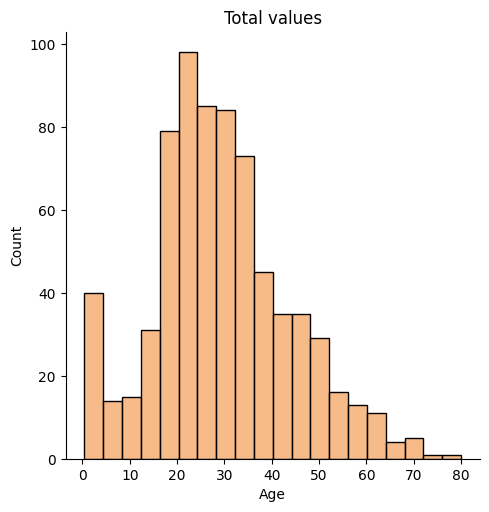

In [150]:
# Alumno: Analizar la distribución de la edad

sns.displot(x=df_cod['Age'], color = 'sandybrown').set(title='Total values')
plt.show()


In [151]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

# Crear una copia "df_norm"

df_norm = df_cod.copy()

In [152]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final

from sklearn.preprocessing import StandardScaler

# creo el objeto de la clase StandardScaler
scaler = StandardScaler()

# aplico la standarización al dataset normalizado
df_norm.loc[:, 'Age'] = scaler.fit_transform(df_norm[['Age']])

df_norm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.530377,1,0
1,1,1,0,0.571831,1,0
2,1,3,0,-0.254825,0,0
3,1,1,0,0.365167,1,0
4,0,3,1,0.365167,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [153]:
# Alumno: genere un numpy array "X" que posea todos los features (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

X = df_norm.drop('Survived', axis=1).values #en el array X, todos MENOS "Survived"
y = df_norm['Survived'].values

In [154]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape

# Entrada a la red neuronal
# El [1] indica que solo toma en cuenta el número de columnas, ya que shape = [filas, columnas].
in_shape = X.shape[1]
in_shape

5

In [155]:
# Alumno: crear una variable out_shape indicando cuantas neuronas de salida desea

# Salida de la red neuronal
out_shape = 1


Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [156]:
# Alumno, generar los dataset de train y test superando en 80%20%

from sklearn.model_selection import train_test_split

# Definimos los parámetros X, y, random_state, al igual que en los modelos de las ejercitaciones anteriores. Ahora varía el tamaño de test_size
# que será 0.2, indicando de esta manera que el porcentaje de valores para realizar validación, será de 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta

model = Sequential()
# Creamos la capa de entrada, y la capa oculta, con las siguientes especificaciones:
# nro de capas de entrada, como cantidad de features -columnas- de entrada >> parámetro 'input_shape'
# nro de neuronas en la capa oculta, como se desee >> parámetro 'units'
model.add(Dense(units=70, activation = 'sigmoid', input_shape=(in_shape,))) #naturalmente, era equivalente escribir "5", el valor de la variable 'in_shape' creada más arriba

# Creamos la capa de salida, con la cantidad de neuronas como se desee. Habíamos elegido out_shape = 1
model.add(Dense(units=out_shape, activation='sigmoid'))

# utilizamos la función de activación sigmoid, ya que deseamos una clasificación binaria (sobrevivió:1;  no sobrevivió: 0)




In [158]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"

# Configuración del modelo para el entrenamiento, implementando el método compile() al objeto (model) creado, de la clase Sequential

# Sobre los parámetros:
# >> optimizer: nombre del optimizador (es el algoritmo que se encarga del descenso de gradiente estocástico)
# >> loss: función de pérdida. Representa las categorías conocidas de las predicción. Para este ejercicio, corresponde 'binary_crossentropy' ya que
# la predicción tiene una salida booleana. (Podría ser 'categorical_corssentropy', si el problema requisiera salidas múltiples, con distintas opciones).
# >> metrics, se define la métrica que evaluará el modelo durante el entrenamiento y las pruebas.
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])


In [159]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"

# Entrenar al modelo con el método fit(), necesita los parámetros:
# >> X_train, y_train 
# >> cantidad de épocas (nro de iteraciones de entrenamiento) 
# >> porcentaje destinado a validación (validation_split=0.2)

history = model.fit(X_train, y_train, validation_split=0.2 , epochs=85, batch_size=20)

Epoch 1/85
23/23 [==============================] - 1s 11ms/step - loss: 0.6550 - accuracy: 0.5987 - val_loss: 0.6753 - val_accuracy: 0.5478
Epoch 2/85
23/23 [==============================] - 0s 4ms/step - loss: 0.6410 - accuracy: 0.6009 - val_loss: 0.6660 - val_accuracy: 0.5478
Epoch 3/85
23/23 [==============================] - 0s 4ms/step - loss: 0.6323 - accuracy: 0.6118 - val_loss: 0.6540 - val_accuracy: 0.5565
Epoch 4/85
23/23 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.6206 - val_loss: 0.6535 - val_accuracy: 0.5565
Epoch 5/85
23/23 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.6316 - val_loss: 0.6395 - val_accuracy: 0.5739
Epoch 6/85
23/23 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.6425 - val_loss: 0.6319 - val_accuracy: 0.6087
Epoch 7/85
23/23 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.6754 - val_loss: 0.6251 - val_accuracy: 0.6348
Epoch 8/85
23/23 [=

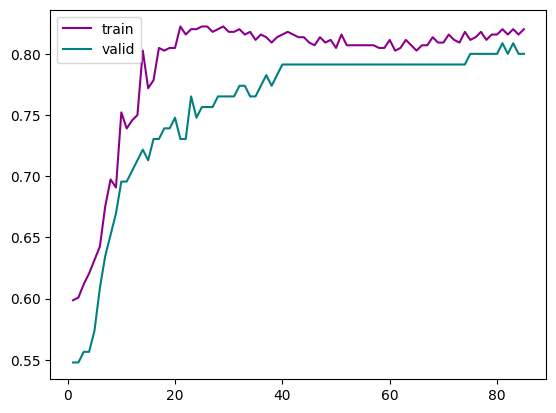

In [160]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line

# Almacenamos en 'epocas_conteo' la lista  que contiene la cantidad de épocas de train.
# >> history, es la variable que definimos en el bloqe anterior, para almacenar las predicciones del modelo (de ella, se puede acceder al historial del accuracy; su evolución)
epocas_conteo= range(1, len(history.history['accuracy']) + 1)

# Graficar 'train' y 'valid', refiere a considerar 'accuracy' y 'val_accuracy', sobre los resultados del entrenamiento model.fit (=history).
sns.lineplot(x=epocas_conteo,  y=history.history['accuracy'], label='train', color = 'darkmagenta')
sns.lineplot(x=epocas_conteo,  y=history.history['val_accuracy'], label='valid', color = 'teal')
plt.show()

In [161]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test

# Almacenamos en 'y_hat_prob', las probabilidades resultantes de las predicciones 
y_hat_prob = model.predict(X_test);

5/5 [==============================] - 0s 3ms/step


In [162]:
# Alumno: transformar las probabilidades en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat

y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]
print(len(y_hat)) 

143


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [163]:
# Alumno, calcular la exactitud (accuracy) de su modelo

from sklearn.metrics import accuracy_score
print(f'Exactitud del modelo ANN: {round(accuracy_score(y_test, y_hat, normalize=True),3)}')

Exactitud del modelo ANN: 0.741


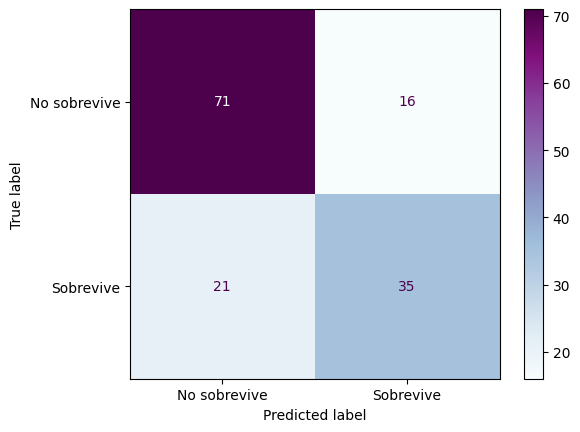

In [164]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creo el objeto -cm- de la clase confusion_matrix(), con las dos variables cuyos valores queremos comparar
cm = confusion_matrix(y_test, y_hat)

# Creo el objeto cmd de la clase ConfusionMatrixDisplay(), correspondiente a visualization de la Confusion Matrix. Sobre sus parámetros:
# >> cm: creado recién, contiene los resultados de la comparación entre los valores reales y predicción.
# >> display_labels, allí especificamos las etiquetas de las categorias que se evalúan.
cmd = ConfusionMatrixDisplay(cm, display_labels=['No sobrevive', 'Sobrevive'])

#elijo un color map de matplotlib, con cmd.plot(cmap=plt.cm.<mapa de colores>)
cmd.plot(cmap=plt.cm.BuPu)

plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [165]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo

resp = int(input('Ingrese 1 para probar modelo o 0 para salir:\n'))
if resp == 0:
    print('Aburrid@, abandona sin jugar!. Adiós!.')

while resp!=0 and resp!=1:
    resp= int(input('Ingreso inválido. Ingrese 1 para probar modelo o 0 para salir:\n'))  

while resp ==1:
    clase = int(input('Ingresar clase de un pasajero: 1, 2 o 3:\n'))
    genre = str(input('Ingresar género: "female" o "male":\n'))
    age = int(input('Ingresar edad de un pasajero:\n'))
    sibs = int(input('Ingresar nro. de hermanos/pareja a bordo:\n'))
    sons = int(input('Ingresar nro. de hijos a bordo:\n'))

    # modificaciones sobre los ingresos genre y age, por haber aplicado anteriormente label enconder a 'Sex', y normalización a 'Age'.
    genre_encoded = int(lencod_sex.transform([genre]))
    age_norm = float(scaler.transform([[age]]))

    X_prueba = np.array([clase, genre_encoded, age_norm, sibs, sons]) # creo vector de prueba, con los datos ingresados y ajustados

    #X_prueba Para poder ejecutar el modelo predictivo, transformo X_prueba a un array de tamaño 1*n.
    X_prueba = X_prueba.reshape(1, -1)
    y_prueba = float(model.predict(X_prueba)) # -------> hace falta convertir a float?

    if y_prueba >= 0.5:
        print('\n\nTe salvarías\no o\n\_/-');
    else:
        print('\n\nTe hundirías\nx  x\n __')

    resp= int(input('\n¿Jugar de nuevo?. Ingrese 1 para probar modelo, o 0 para salir:\n'))

if resp == 0:
    print('\nGracias por jugar!. Vuelva prontoS!.')

        

Ingrese 1 para probar modelo o 0 para salir:
1
Ingresar clase de un pasajero: 1, 2 o 3:
1
Ingresar género: "female" o "male":
male
Ingresar edad de un pasajero:
14
Ingresar nro. de hermanos/pareja a bordo:
2
Ingresar nro. de hijos a bordo:
0
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(




Te salvarías
o o
\_/-

¿Jugar de nuevo?. Ingrese 1 para probar modelo, o 0 para salir:
0

Gracias por jugar!. Vuelva prontoS!.
